## Liberaries


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

### Read Dataset

In [41]:
df = pd.read_csv("E:/TU/2nd/Term 2/ML/Project/Dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
print('Shape :',df.shape)
print('='*100)
print('Columns :',df.columns)


Shape : (891, 12)
Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [45]:
# drop unnecessary columns
df.drop(['PassengerId','Name','Ticket','Cabin'] , axis = 1 , inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
# Check missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [47]:
# Treat missing value
df.Age.fillna(df.Age.mean(), inplace= True)

C:\Users\MAZEN\AppData\Local\Temp\ipykernel_22148\2574574305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace= True)


In [48]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
df.fillna('S' , inplace= True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
# Check Duplication
df.duplicated().sum()

111

In [51]:
#traet duplication
df.drop_duplicates(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [53]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

### Data spliting

In [54]:
x = df.drop('Survived' , axis=1)
y = df['Survived']

In [55]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [56]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.shape)
print(y_train.shape)

(624, 7)
(624,)


In [59]:
print(X_test.shape)
print(y_test.shape)

(156, 7)
(156,)


In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Custom SVM Implementation

In [61]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

### VisualizationsTrain and Evaluate Custom SVM

In [62]:
custom_svm = SVM()
custom_svm.fit(X_train.values, y_train.values)
custom_preds = custom_svm.predict(X_test.values)
custom_preds = np.where(custom_preds <= 0, 0, 1)

print("Custom SVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, custom_preds))
print("\nClassification Report:")
print(classification_report(y_test, custom_preds))

Custom SVM Results:
Confusion Matrix:
[[74 17]
 [33 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        91
           1       0.65      0.49      0.56        65

    accuracy                           0.68       156
   macro avg       0.67      0.65      0.65       156
weighted avg       0.68      0.68      0.67       156



### Train and Evaluate Sklearn SVM

In [63]:
sklearn_svm = SVC(kernel='linear')
sklearn_svm.fit(X_train, y_train)
sklearn_preds = sklearn_svm.predict(X_test)

print("\nSklearn SVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, sklearn_preds))
print("\nClassification Report:")
print(classification_report(y_test, sklearn_preds))


Sklearn SVM Results:
Confusion Matrix:
[[75 16]
 [20 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        91
           1       0.74      0.69      0.71        65

    accuracy                           0.77       156
   macro avg       0.76      0.76      0.76       156
weighted avg       0.77      0.77      0.77       156



### Model Comparison Visualizations

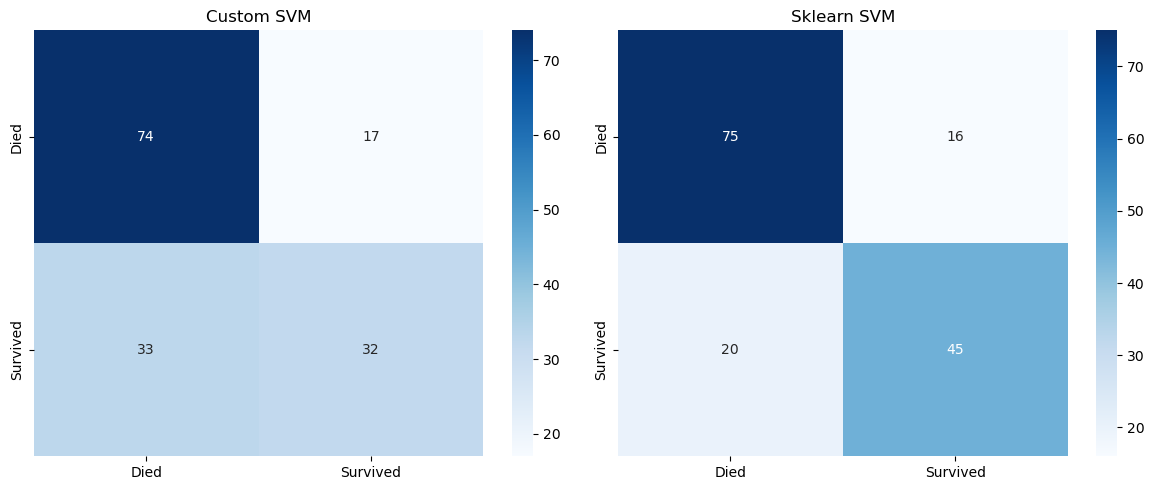

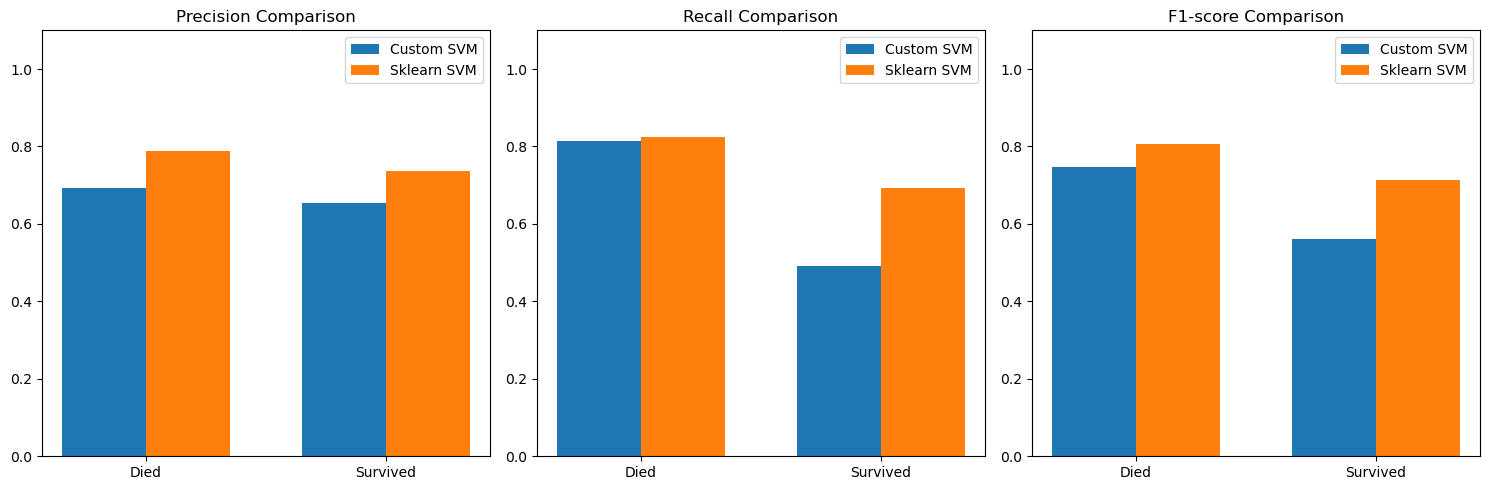

In [64]:
# Confusion Matrix Comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
custom_cm = confusion_matrix(y_test, custom_preds)
sns.heatmap(custom_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Custom SVM')

plt.subplot(1, 2, 2)
sklearn_cm = confusion_matrix(y_test, sklearn_preds)
sns.heatmap(sklearn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Sklearn SVM')

plt.tight_layout()
plt.show()

# Metrics Comparison
custom_report = classification_report(y_test, custom_preds, output_dict=True)
sklearn_report = classification_report(y_test, sklearn_preds, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    
    custom_scores = [custom_report[cls][metric] for cls in classes]
    sklearn_scores = [sklearn_report[cls][metric] for cls in classes]
    
    x = np.arange(len(classes))
    width = 0.35
    
    plt.bar(x - width/2, custom_scores, width, label='Custom SVM')
    plt.bar(x + width/2, sklearn_scores, width, label='Sklearn SVM')
    
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(x, ['Died', 'Survived'])
    plt.ylim(0, 1.1)
    plt.legend()

plt.tight_layout()
plt.show()

### Decision Boundary Visualization

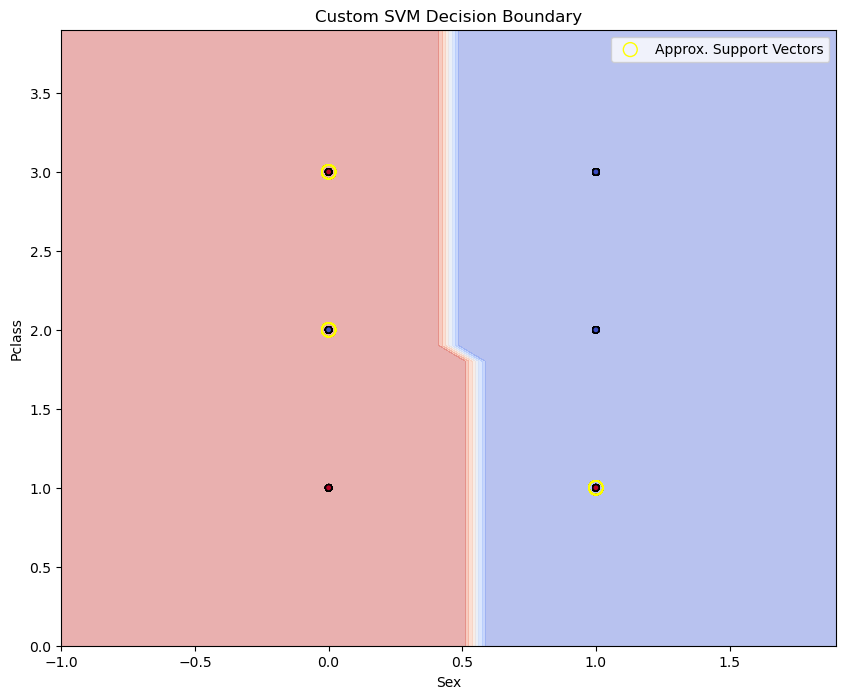

In [65]:
# Get two most important features
if hasattr(custom_svm, 'w'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': np.abs(custom_svm.w)
    }).sort_values('Importance', ascending=False)
    top_features = feature_importance['Feature'].values[:2]
else:
    top_features = ['Pclass', 'Fare']

X_vis = X_train[top_features].values
y_vis = y_train.values

# Train on these two features
svm_vis = SVM()
svm_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict and plot
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', s=20, edgecolor='k')

if hasattr(svm_vis, 'w'):
    distances = np.abs(np.dot(X_vis, svm_vis.w) - svm_vis.b) / np.linalg.norm(svm_vis.w)
    sv_indices = np.where(distances < 0.5)[0]
    plt.scatter(X_vis[sv_indices, 0], X_vis[sv_indices, 1], 
                facecolors='none', edgecolors='yellow', s=100, 
                label='Approx. Support Vectors')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Custom SVM Decision Boundary')
plt.legend()
plt.show()

### Training Progress Visualization

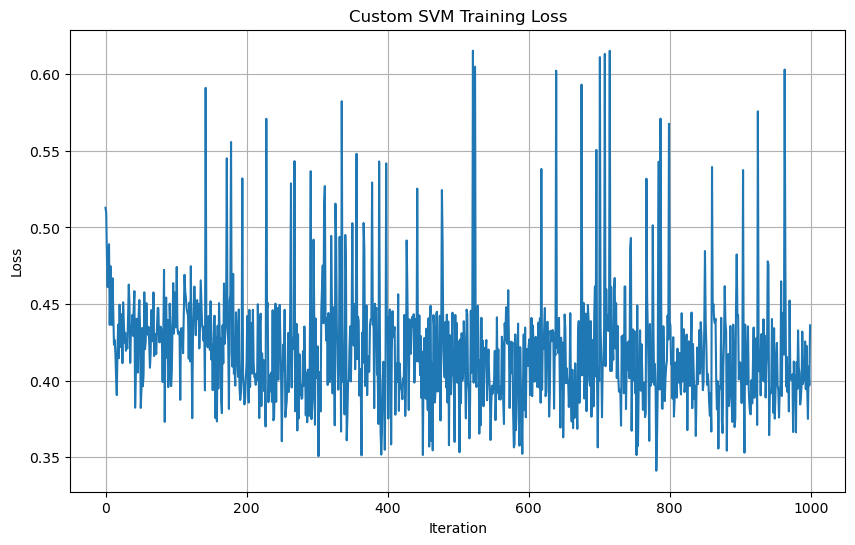

In [66]:
class SVM_Tracked(SVM):
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        self.loss_history = []
        
        for _ in range(self.n_iters):
            loss = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                    loss += self.lambda_param * np.sum(self.w**2)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    loss += max(0, 1 - y_[idx]*(np.dot(x_i, self.w) - self.b)) + self.lambda_param * np.sum(self.w**2)
            self.loss_history.append(loss/n_samples)

svm_tracked = SVM_Tracked()
svm_tracked.fit(X_train.values, y_train.values)

plt.figure(figsize=(10, 6))
plt.plot(svm_tracked.loss_history)
plt.title('Custom SVM Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()